In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  

In [212]:
# read data file
Fraud = pd.read_csv('Fraud_check.csv')

In [213]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [214]:
Fraud.shape

(600, 6)

In [215]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [216]:
Fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [217]:
#Complete Fraud dataset
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad']) 

In [218]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status']) 

In [219]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban']) 

In [220]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [221]:
Fraud["Tax_Inc"]=np.where(Fraud["Taxable.Income"] <= 30000, "Risky", "Good")

In [222]:
Fraud["Tax_Inc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_Inc, Length: 600, dtype: object

In [223]:
Fraud.head(50)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Inc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
5,0,0,33329,116382,0,0,Good
6,0,0,83357,80890,8,1,Good
7,1,2,62774,131253,3,1,Good
8,0,2,83519,102481,12,1,Good
9,1,0,98152,155482,4,1,Good


In [224]:
Fraud.Tax_Inc.value_counts()

Good     476
Risky    124
Name: Tax_Inc, dtype: int64

In [225]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Tax_Inc']= label_encoder.fit_transform(Fraud['Tax_Inc']) 

In [226]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Inc
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [227]:
Fraud.Tax_Inc.value_counts()

0    476
1    124
Name: Tax_Inc, dtype: int64

In [228]:
# Split features and target
X = Fraud[["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]]
y = Fraud["Tax_Inc"]

In [229]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [230]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Inc, Length: 600, dtype: int32

In [231]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=40) 

# Decision Tree model
# Building Decision Tree Classifier using Entropy Criteria

In [232]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

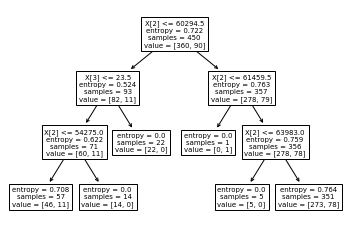

In [233]:
#PLot the decision tree
tree.plot_tree(model);

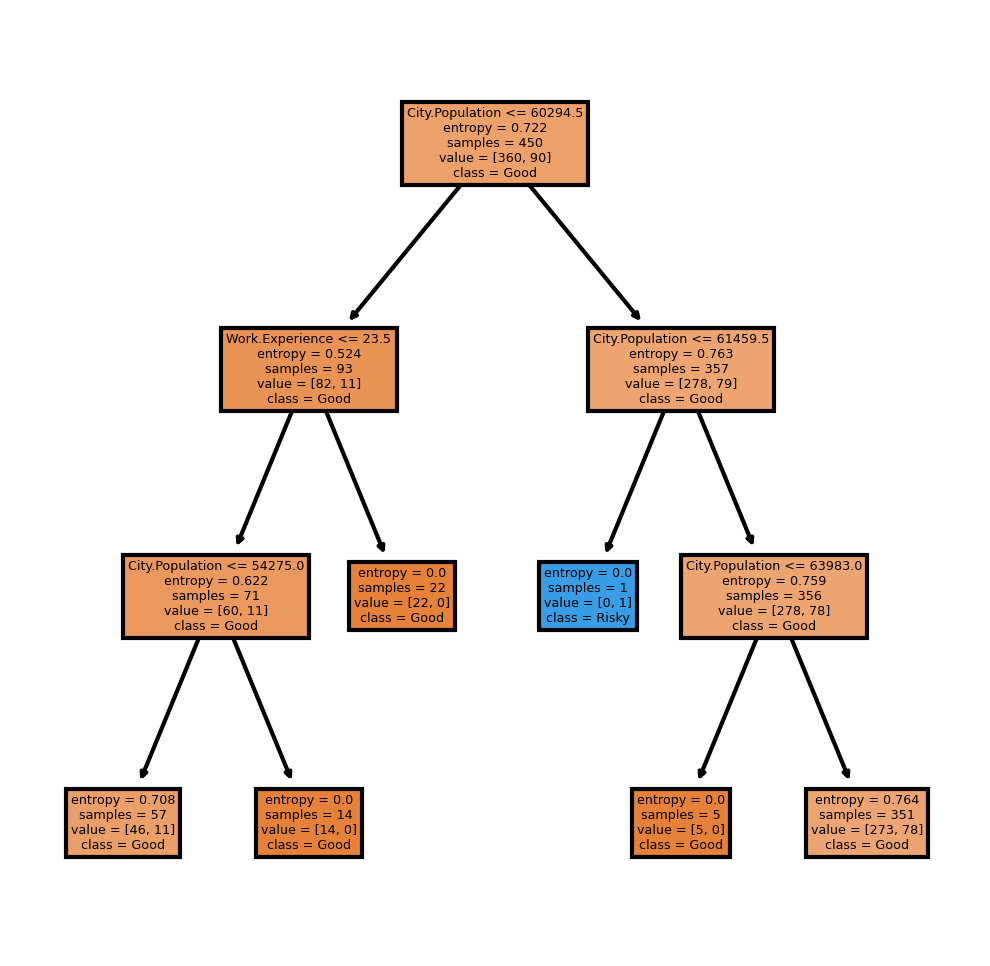

In [234]:
fn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [235]:
text = tree.export_text(model,max_depth=3)  
print(text)

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 23.50
|   |   |--- feature_2 <= 54275.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  54275.00
|   |   |   |--- class: 0
|   |--- feature_3 >  23.50
|   |   |--- class: 0
|--- feature_2 >  60294.50
|   |--- feature_2 <= 61459.50
|   |   |--- class: 1
|   |--- feature_2 >  61459.50
|   |   |--- feature_2 <= 63983.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  63983.00
|   |   |   |--- class: 0



In [236]:
model.feature_importances_ 

array([0.        , 0.        , 0.71746105, 0.28253895, 0.        ])

In [237]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

City.Population    0.717461
Work.Experience    0.282539
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

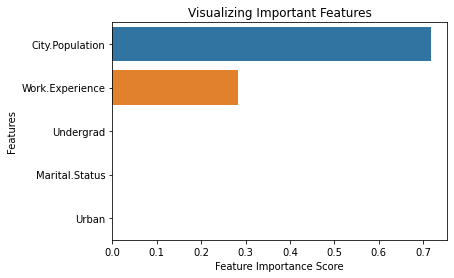

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [239]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    150
dtype: int64

In [240]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0
Tax_Inc,
0,116
1,34


In [241]:
# Accuracy 
np.mean(preds==y_test)

0.7733333333333333

In [242]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[116,   0],
       [ 34,   0]], dtype=int64)

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Building Decision Tree Classifier (CART) using Gini Criteria

In [244]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 
model_gini.fit(x_train, y_train) 


DecisionTreeClassifier(max_depth=3)

In [245]:
#Prediction and computing the accuracy
pred_g=model_gini.predict(x_test)
np.mean(pred_g==y_test) 

0.7733333333333333

In [246]:
model_gini.feature_importances_

array([0.        , 0.        , 0.73301548, 0.21090339, 0.05608113])

In [247]:
import pandas as pd
feature_imp_gini = pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp_gini

City.Population    0.733015
Work.Experience    0.210903
Urban              0.056081
Undergrad          0.000000
Marital.Status     0.000000
dtype: float64

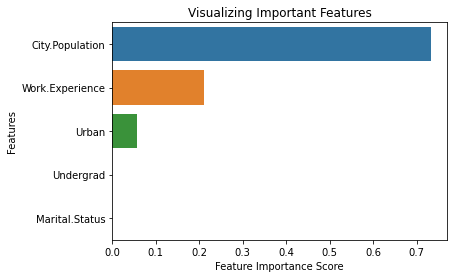

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [249]:
print(model_gini.tree_.node_count)
print(model_gini.tree_.max_depth)


13
3


In [250]:

#print("Training accuracy: ",accuracy_score(y_train,y_pred_train))
print(classification_report(y_test,pred_g))


              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [251]:
print("Test accuracy: ",accuracy_score(y_test,pred_g))

Test accuracy:  0.7733333333333333


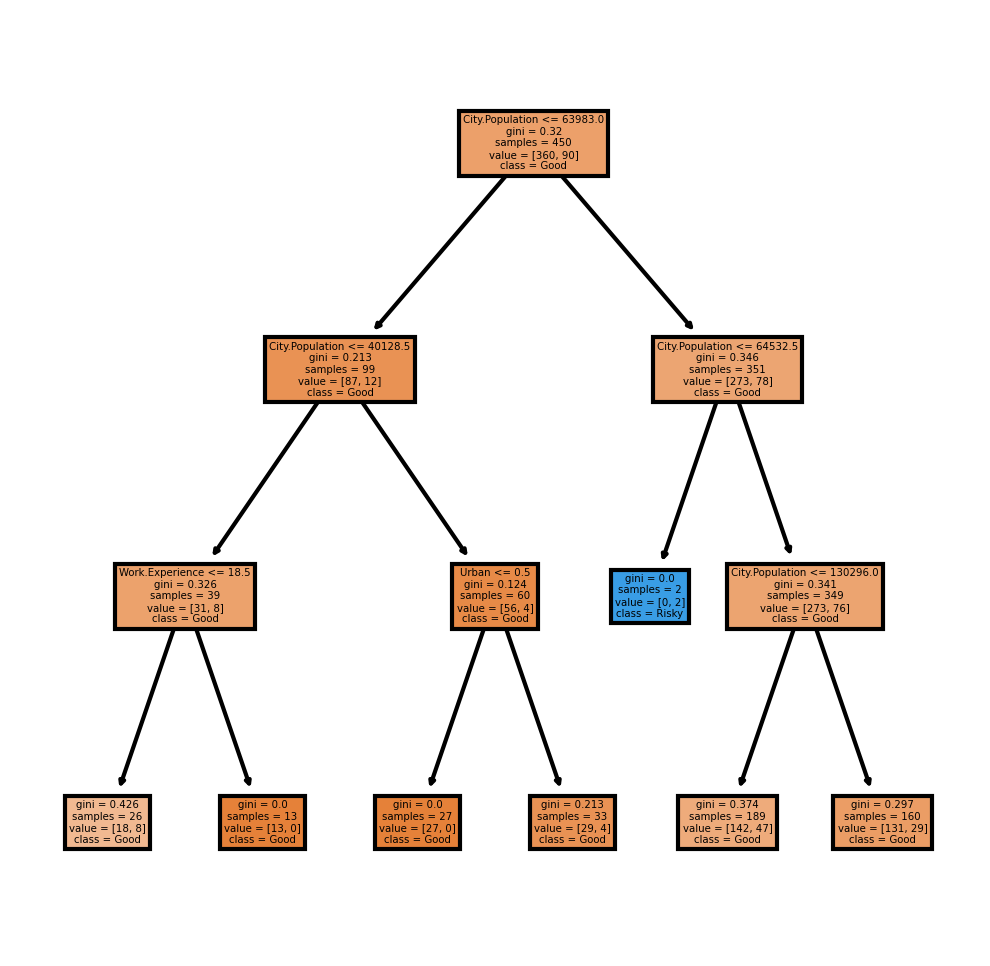

In [252]:
fn=["Undergrad","Marital.Status","City.Population","Work.Experience","Urban"]
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
#We can see above are decision tree models created based on entropy and gini impurities criteria.